In [1]:
##1.1
import pandas as pd
#Se lee manualmente.
data_1 = {
        'id': ['1', '2', '3', '4', '5'],
        'primer_nombre': ['Alex', 'Amy', 'Valentina', 'Alice', 'Lina'], 
        'apellido': ['Anderson', 'Ruales', 'Marin', 'Barbosa', 'Robles']}

data_2 = {
        'id': ['4', '5', '6', '7', '8'],
        'primer_nombre': ['Luis', 'Brian', 'Mariana', 'Marcela', 'Carlos'], 
        'apellido': ['Ruiz', 'Giralgo', 'Ortegon', 'Palacios', 'Gallego']}

data_3 = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}


In [89]:
df1 = pd.DataFrame(data_1)#Se crean los tres dataframe.
df2 = pd.DataFrame(data_2)
df3 = pd.DataFrame(data_3)
fil=pd.concat([df1,df2],axis=1) #Union por filas.
col=pd.concat([df1,df2],axis=0) #Union por columnas.


In [35]:
df4=pd.merge(df1,df2,how="outer") #Merge de todos los datos.
pd.merge(df3,df4, how="right",on="id") #Merge para todos los datos y el tercer DF en "id"

id  test_id primer_nombre  apellido
0  1     51.0          Alex  Anderson
1  2     15.0           Amy    Ruales
2  3     15.0     Valentina     Marin
3  4     61.0         Alice   Barbosa
4  5     16.0          Lina    Robles
5  4     61.0          Luis      Ruiz
6  5     16.0         Brian   Giralgo
7  6      NaN       Mariana   Ortegon
8  7     14.0       Marcela  Palacios
9  8     15.0        Carlos   Gallego

In [31]:
df4=pd.merge(df1,df2,on="id") #Mismo id.
pd.merge(df3,df4,on="id")

id  test_id primer_nombre_x apellido_x primer_nombre_y apellido_y
0  4       61           Alice    Barbosa            Luis       Ruiz
1  5       16            Lina     Robles           Brian    Giralgo

In [37]:
##1.2
datos=pd.read_csv("datos_alcohol.txt") #Se leen los datos.
datos

pais  porciones_cerveza  porciones_licor  porciones_vino  \
0    Afghanistan                  0                0               0   
1        Albania                 89              132              54   
2        Algeria                 25                0              14   
3        Andorra                245              138             312   
4         Angola                217               57              45   
..           ...                ...              ...             ...   
188    Venezuela                333              100               3   
189      Vietnam                111                2               1   
190        Yemen                  6                0               0   
191       Zambia                 32               19               4   
192     Zimbabwe                 64               18               4   

     litros_totales_de_alcohol_puro continente  
0                               0.0         AS  
1                               4.9         EU  
2                               0.7         AF  
3                              12.4         EU  
4                               5.9         AF  
..                              ...        ...  
188                             7.7         SA  
189                             2.0         AS  
190                             0.1         AS  
191                             2.5         AF  
192                             4.7         AF  

[193 rows x 6 columns]

In [43]:
datos.groupby("continente").porciones_cerveza.mean() #Se agrupa por continente y se sacan las medias.
#El continente que màs consume cerveza en promedio es Europa.

continente
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: porciones_cerveza, dtype: float64

In [41]:
datos["porciones_vino"].describe() #Analisis del consumo de vino.

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: porciones_vino, dtype: float64

In [45]:
datos.groupby("continente").litros_totales_de_alcohol_puro.max() #Valor màximo de consumo de licor por continente.

continente
AF     9.1
AS    11.5
EU    14.4
OC    10.4
SA     8.3
Name: litros_totales_de_alcohol_puro, dtype: float64

In [46]:
datos.groupby("continente").litros_totales_de_alcohol_puro.min() #Valor mìnimo de consumo de licor por continente.

continente
AF    0.0
AS    0.0
EU    0.0
OC    0.0
SA    3.8
Name: litros_totales_de_alcohol_puro, dtype: float64

In [48]:
datos.groupby("continente").litros_totales_de_alcohol_puro.mean() #Valor promedio de consumo de licor por continente.

continente
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: litros_totales_de_alcohol_puro, dtype: float64

In [50]:
datos.groupby("continente").mean() #Consumo medio de alcohol de cada continente para todas las columnas.

porciones_cerveza  porciones_licor  porciones_vino  \
continente                                                       
AF                  61.471698        16.339623       16.264151   
AS                  37.045455        60.840909        9.068182   
EU                 193.777778       132.555556      142.222222   
OC                  89.687500        58.437500       35.625000   
SA                 175.083333       114.750000       62.416667   

            litros_totales_de_alcohol_puro  
continente                                  
AF                                3.007547  
AS                                2.170455  
EU                                8.617778  
OC                                3.381250  
SA                                6.308333

In [72]:
##1.3
vis=pd.read_csv("visulualizacion.txt")
vis=vis.drop(vis.iloc[:,0:1].columns,axis=1) #Se elimina la columna de index.
vis

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

array([[<AxesSubplot:title={'center':'total_bill'}>]], dtype=object)

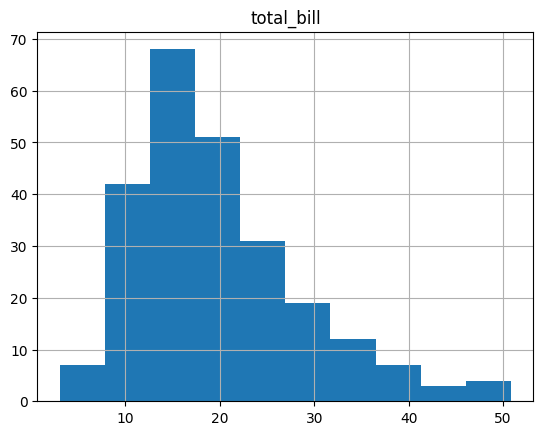

In [75]:
import matplotlib.pyplot as plt
vis.hist(column="total_bill") #Histograma de total_bill.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

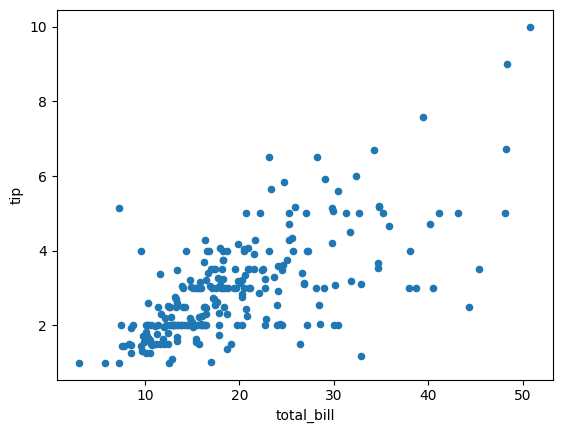

In [76]:
vis.plot.scatter(x="total_bill",y="tip") #Scatter plot de la relaciòn entre total_bill y tip.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

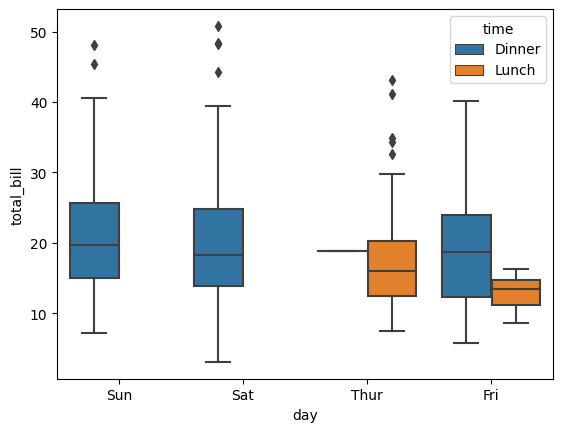

In [85]:
from seaborn import boxplot
boxplot(x="day", y="total_bill", hue="time", data=vis) #Box plot del total_bill por día diferenciando la hora.